# Lab Intro | Neural Networks and Deep Learning

In this notebook we introduce some basic tools and concepts that will be used throught the practical sessions of the course. 

Credit: some parts of this notebook have been taken from the [PyTorch Documentation](https://pytorch.org/docs/stable/index.html).

# MIQUEL MONGE DALMAU, NIU: 1565230

## Instructions and basic set-up

The course's lab material will be made available in the virtual campus (section "Materials") as well as through the GitHub repository of the course which is at: https://github.com/lluisgomez/XN-ED-2021-22

To work from home it is recommended to use [Google CoLab](https://colab.research.google.com/). Alternatively, you can use [Amazon SageMaker Studio Lab](https://studiolab.sagemaker.aws/).

If you decide to use either Google CoLab or Amazon SageMaker Studio, remember that you can open notebooks directly from the GitHub repository of the course.

To work offline, you can install any Python distribution (e.g. [Anaconda 3](https://www.anaconda.com/products/individual)) and [Jupyter](https://jupyter.org/). You will also need to install necessary modules, principally: Numpy, Matplotlib, Pytorch. If you decide to work offline, you should download the notebook files from this page or from the course's GitHub to your computer.

## Jupyter and Colab

Jupyter Notebook is a web based application for creating and sharing computational documents. It offers a simple, streamlined, document-centric experience.

The Jupyter Notebook has become a popular user interface for cloud computing, and many cloud providers have adopted the Jupyter Notebook or derivative tools as a frontend interface for cloud users. Examples include Amazon's SageMaker Notebooks, and Google's Colaboratory.

[Google Colaboratory](https://colab.research.google.com/) (also known as Colab) is a free Jupyter notebook environment that runs in the cloud. Colab allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

If you have never used Colab we recommend you to take a look to the [Welcome to Colab Notebook](https://colab.research.google.com/notebooks/intro.ipynb).


## What is PyTorch?

[PyTorch](https://pytorch.org/) is a Python based scientific computing package targeted at two sets of audiences:

-  Tensor library with GPU acceleration
-  A deep learning research platform that provides maximum flexibility and speed


### Import the library

In [1]:
import torch

### Getting quick help and autompletions in Jupyter/Colab

Colab provides automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, insert your cursor after `torch` and press **Period**(`.`), you will see the list of available completions within the `torch` module. Completions can be opened again by using **Ctrl+Space**.

In [ ]:
torch.

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
torch.nn.Linear()

To quickly access documentation, type ? before or after an object and press the run key (**Shift+Enter**).

In [ ]:
torch.Tensor?

Jupyter also provides a means of wildcard matching for names using the `*` character.

In [ ]:
# What about all `*Tensor`s?
torch.*Tensor?

To quickly access documentation including the source code, type ?? before or after an object and press the run key (**Shift+Enter**)

In [ ]:
torch.nn.Module??

### First steps with Torch Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see [Bridge with NumPy](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label) for more details). Tensors are also optimized for automatic differentiation. We’ll see a bit more about automatic differentiation later in the Gradient Computation section, but you will get a much better understanding of it in the next lab session (next week Autograd Notebook). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. 

#### Initializing Tensors

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

print(x_data)
print(type(x_data))

tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>


**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa).

In [ ]:
import numpy as np

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0815, 0.8442],
        [0.6328, 0.4151]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.9748, 0.3298, 0.0053],
        [0.5721, 0.7730, 0.0923]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)
print(tensor)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
# Tots els tensors és creen per defecte a la CPU, veurem maneres per moure'ls a la GPU.

tensor([[0.7739, 0.5681, 0.9037, 0.6350],
        [0.9615, 0.4419, 0.7769, 0.1886],
        [0.7026, 0.4182, 0.4491, 0.9192]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


The Tensor class has also many useful methods for getting / inspecting Tensors attributes.

In [ ]:
print(f'Tensor size: {tensor.size()}')
print(f'Numnber of elements: {tensor.numel()}')
print(f'Dimensions: {tensor.dim()}')

Tensor size: torch.Size([3, 4])
Numnber of elements: 12
Dimensions: 2


#### Operations on Tensors

Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

**Standard numpy-like indexing and slicing:**

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** 

You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html>),
another tensor joining op that is subtly different from ``torch.cat``.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Arithmetic Operations**

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

**In-place operations**

Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix.
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


<div class="alert alert-info"><h4>Note</h4><p>In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>

No és el mateix crear un nou tensor i sumar 5, que sumar aquests 5 directament al tensor i mutar-lo. Pot ser útil per estalviar memòria, però no és recomanable.

In [ ]:
# Mind the underscore!
# Any operation that mutates a tensor in-place is post-fixed with an _.
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
tensor.random_(10)
print(tensor)

tensor([[3., 0., 5., 3.],
        [0., 9., 4., 4.],
        [0., 6., 2., 1.],
        [9., 9., 6., 2.]])


In [ ]:
# As you can see zero_ would replace r with 0's which was originally filled with integers
tensor.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

#### Using the GPU

Each of these operations can be run on the GPU (at typically higher speeds than on a CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using ``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [ ]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use the first gpu available if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Tensors can be moved between gpu and cpu memory

tensor = torch.randn(5, 5) # create a 5x5 matrix filled with random numbers
print(f"tensor's device: {tensor.device}") # by default tensors are stored in cpu memory (RAM)

# Move your tensor to GPU device 0 if there is one (first GPU in the system)
if torch.cuda.is_available():
    tensor = tensor.to(device) # tensor.cuda() is an alternative although not recommended
print(f"tensor's device: {tensor.device}")

tensor's device: cpu
tensor's device: cuda:0


In [ ]:
# A common mistake 
a = torch.randn(5, 2, device=device)
b = torch.randn(1, 2)

# This throws an exception, since you can't operate on tensors stored in
# different devices, and the error message is pretty clear about that
c = a * b

RuntimeError: ignored

### Playing with Vectors (1D Tensors)

In [ ]:
# Creates a 1D tensor of integers 1 to 4
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [ ]:
# Print number of dimensions (1D) and size of tensor
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [ ]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [ ]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [ ]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [ ]:
# In-place replacement of random number from 0 to 10
x = torch.Tensor(5).random_(10)
x

tensor([8., 3., 2., 3., 9.])

In [ ]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 8.0, last: 9.0


In [ ]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([3., 2.])

In [ ]:
# Create a tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [ ]:
# Square all elements in the tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


### Playing with Matrices (2D Tensors)

In [ ]:
# Create a 2x4 tensor
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [ ]:
m.dim()

2

In [ ]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [ ]:
# Indexing row 0, column 2 (0-indexed)
m[0][2]

tensor(3.)

In [ ]:
# Indexing row 0, column 2 (0-indexed)
m[0, 2]

tensor(3.)

In [ ]:
# Indexing column 1, all rows (returns size 2)
m[:, 1]

tensor([5., 2.])

In [ ]:
# Indexing column 1, all rows (returns size 2x2)
m[:, [1]]

tensor([[5.],
        [2.]])

In [ ]:
# Indexes row 0, all columns (returns 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [ ]:
# Create tensor of numbers from 1 to 5 (excluding 5)
v = torch.arange(1., 4 + 1)
v

tensor([1., 2., 3., 4.])

In [ ]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [ ]:
# Scalar product
m @ v

tensor([49., 47.])

In [ ]:
# Calculated by 1*2 + 2*5 + 3*3 + 4*7
m[0, :] @ v

tensor(49.)

In [ ]:
# Calculated by 
m[[1], :] @ v

tensor([47.])

In [ ]:
# Add a random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.2199, 5.6979, 3.1743, 7.4635],
        [4.8314, 2.5636, 1.6436, 9.1526]])

In [ ]:
# Subtract a random tensor of size 2x4 to m
m - torch.rand(2, 4)

tensor([[1.6620, 4.7169, 2.2719, 6.5713],
        [3.8553, 1.8070, 0.4813, 8.0650]])

In [ ]:
# Multiply a random tensor of size 2x4 to m
m * torch.rand(2, 4)

tensor([[1.1085, 4.2372, 1.8879, 0.9186],
        [3.0098, 0.5888, 0.1776, 7.5435]])

In [ ]:
# Divide m by a random tensor of size 2x4
m / torch.rand(2, 4)

tensor([[ 3.0412,  6.9630,  4.0787, 20.2581],
        [13.4036,  8.5713,  4.4070, 67.2971]])

In [ ]:
m.size()

torch.Size([2, 4])

In [ ]:
# Transpose tensor m, which is essentially 2x4 to 4x2
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [ ]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [ ]:
# Matrix product of two tensors.

tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
torch.matmul(tensor1, tensor2)

tensor(1.0724)

In [ ]:
# Matrix multiplication
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)
torch.mm(mat1, mat2)

tensor([[-0.4248,  0.5303,  0.3537],
        [-0.2356,  4.9582, -3.1867]])

### Broadcasting

Many PyTorch operations support NumPy’s broadcasting semantics. See https://numpy.org/doc/stable/user/basics.broadcasting.html for details.

In short, if a PyTorch operation supports broadcast, then its Tensor arguments can be automatically expanded to be of equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

*   Each tensor has at least one dimension.
*   When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


In [ ]:
x=torch.empty(5,7,3)
y=torch.empty(5,7,3)
# x and y are broadcastable since all dimensions are equal

x=torch.empty((0,))
y=torch.empty(2,2)
# x and y are not broadcastable, because x does not have at least 1 dimension

x=torch.empty(5,3,4,1)
y=torch.empty(  3,1,1)
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

# but:
x=torch.empty(5,2,4,1)
y=torch.empty(  3,1,1)
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

In [ ]:
# How is the output dimension calculated?
x=torch.empty(5,1,4,1)
y=torch.empty(3,1,1)
print((x+y).size())

x=torch.empty(1)
y=torch.empty(3,1,7)
print((x+y).size())

torch.Size([5, 3, 4, 1])
torch.Size([3, 1, 7])


### Other Constructors

In [ ]:
# Create tensor from 3 to 8, with each having a space of 1
torch.arange(3., 8 + 1)

tensor([3., 4., 5., 6., 7., 8.])

In [ ]:
# Create tensor from 5.7 to -2.1 with each having a space of -3
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [ ]:
# returns a 1D tensor of steps equally spaced points between start=3, end=8 and steps=20
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [ ]:
# Create a tensor filled with 0's
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
# Create a tensor filled with 1's
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [ ]:
# Create a tensor with the diagonal filled with 1
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

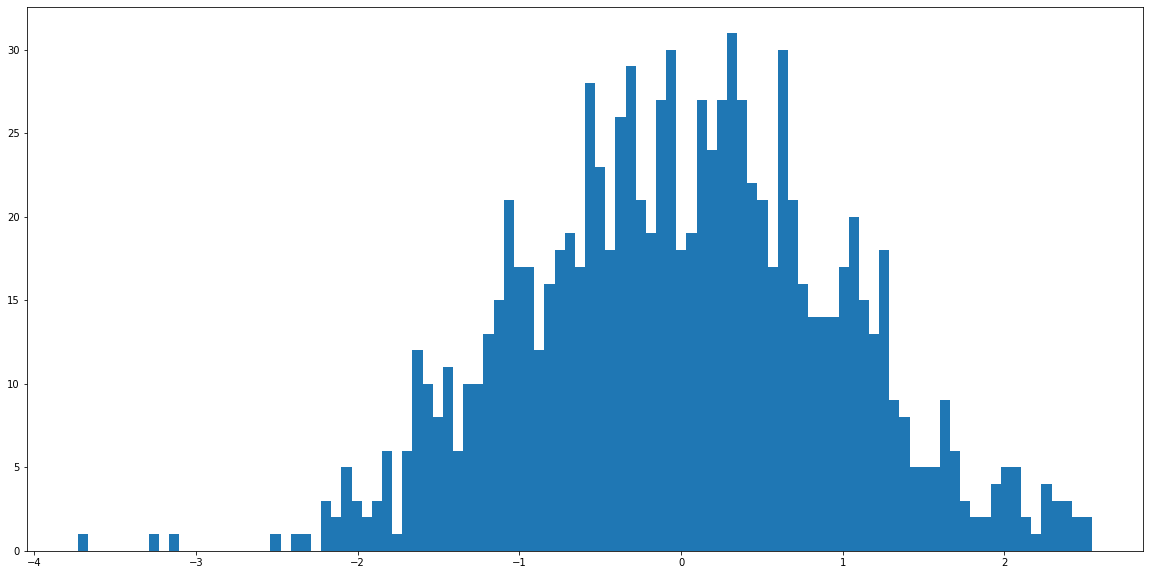

In [ ]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

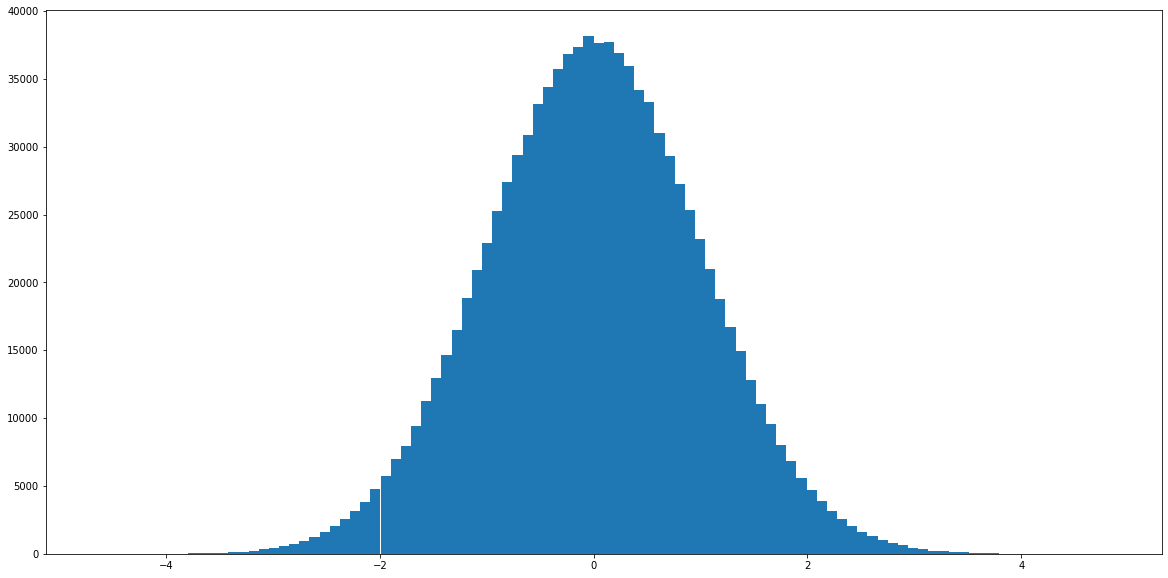

In [ ]:
plt.hist(torch.randn(10**6).numpy(), 100);

### Casting

In [ ]:
# Helper to get what kind of tensor types
torch.*Tensor?

In [ ]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]])
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [ ]:
# This is basically a 64 bit float tensor
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [ ]:
# This creates a tensor of type int8
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [ ]:
# Converts tensor to numpy array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [ ]:
# In-place fill of column 0 and row 0 with value -1
m_np[0, 0] = -1
m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [ ]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [ ]:
# Create a tensor of integers ranging from 0 to 4
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [ ]:
# In-place multiplication of all elements by 2 for tensor n
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

### Views and Strides

The `Tensor.view(*shape)` method returns a new tensor with the same data as the self tensor but of a different shape.

The returned tensor shares the same data and must have the same number of elements, but may have a different size. For a tensor to be viewed, the new view size must be compatible with its original size and stride.

In [ ]:
t = torch.zeros(3, 4, 2)
t

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

In [ ]:
r = t.view(3, 8)
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# What are the Tensor strides and how are they related to shapes?
print(t.stride(), r.stride())
print(t.shape, r.shape)

(8, 2, 1) (8, 1)
torch.Size([3, 4, 2]) torch.Size([3, 8])


## Gradient Computation

You will get a much better understanding of gradient computations and automatic differentiation in the next lab session (next week Autograd Notebook).

In [ ]:
# Tensors also track the operations applied on them in order to differentiate them

# setting requires_grad to true tells the autograd engine that we want to compute
# gradients for this tensor
a = torch.tensor([2., 3.], requires_grad=True)

L = 3*a**3
L.sum().backward()
print(f"Gradient of a with respecto to L: {a.grad}")

Gradient of a with respecto to L: tensor([36., 81.])


Lets check if the computed gradients are correct:

$
\frac{\partial{L}}{\partial{a}} = [9 * a_1^2, 9 * a_2^2] \\
\frac{\partial{L}}{\partial{a}} = [9 * 2^2, 9 * 3^2] \\
\frac{\partial{L}}{\partial{a}} = [36, 81]
$

As we can see the gradient vector matches the one computed by the autograd engine (no surprise there)

In [ ]:
# Notice that the output tensor of an operation will require gradients even 
# if only a single input tensor has requires_grad=True.

x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does a require gradients? : {a.requires_grad}")
b = x + z
print(f"Does b require gradients?: {b.requires_grad}")

Does a require gradients? : False
Does b require gradients?: True


## Much more

There's definitely much more, but this was the basics about `Tensor`s.

We strongly recommend you to take a look at the *Torch* API Documentation [here](https://pytorch.org/docs/stable/index.html).


# Homework

A) The code below simulates a tiny neural network, however it throws an exception. As you build neural networks in PyTorch you will see this exception **often**. Look at the error message, explain whats happening and make the necessary changes to the code to get an output from this tiny network

B) Once you manage to sucessfully run the code below notice how the shape of the tensors ```fts``` and ```bias``` are drastically different, yet they can be added together. Which internal PyTorch mechanism makes this addition happen?

A) El que està passant és que estem intentant fer la multiplicació de dos vectors amb la mateixa dimensió (1,5). Els dos s'inicialitzen de forma aleatòria amb les mateixes dimensions i valor de bias. El cálcul del *fts* és donat per la suma entre el valor del bias i el resultat de la multiplicació entre els tensors *features* i *weights*.

El problema com hem dit és que els tensors tenen la mateixa dimensió i no es pot fer la multiplicació de les seves matrius, podríem arreglar això de diverses maneres, la més fàcil és transposar amb .T un dels tensors, en aquest cas *features*.

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))
fts = torch.mm(features.T, weights)
print(fts + bias)
print(fts.shape, bias.shape)

tensor([[ 0.4490,  0.3699,  0.1368,  0.2974,  0.5646],
        [-0.3858,  0.0381,  1.2865,  0.4263, -1.0048],
        [-0.5296, -0.0190,  1.4845,  0.4485, -1.2751],
        [ 1.3148,  0.7140, -1.0556,  0.1637,  2.1922],
        [-1.1953, -0.2836,  2.4014,  0.5513, -2.5266]])
torch.Size([5, 5]) torch.Size([1, 1])


B) Un cop transposat el tensor *features*, aquest té una dimensió de (5,5). EL tensor bias és un únic número (1,1).

Podem fer la suma de tensors de diferent dimensió mitjançant el mecanisme de ***broadcasting***. Aquest mecanisme s'encarrega d'adaptar els valors dels tensors perquè es puguin sumar entre ells.


C) Answer the following questions about the cell below

1. Does the value of ```t``` change? Why?
2. Does the shape of ```t``` change? Why?
3. Explain, in your own words. What is the stride of a tensor, why is it convenient to have them?
4.  Pick a mathematical operation like cosine or square root (not those though 🙂). Can you find elementwise operations in the [torch library](https://pytorch.org/docs/stable/torch.html#pointwise-ops). 
5. Apply the function element-wise to ```a```. Does it return an error? Why? How can it be fixed?
6. Is there a version of the function that operates in place?
7. Run the same funcion on the GPU. Do you notice any difference in runtime? If not, why do you think that is?

In [ ]:
from time import time

start_time = time()
t = torch.tensor(list(range(9)))

a = t.view(3, 3)
a.mul_(2)

print(f"Tems total: {round(time() - start_time, 5)}")

Tems total: 0.01365


1. El valor del tensor ***t*** sí que canvia. Ja que s'ha creat un altre tensor que apunta al mateix espai de memòria on està el tensor *t*. Per tant, quan un d'aquests es modifica, ho fa tot el tensor d'aquell espai de memòria, en conseqüència, tots els tensors que apuntin allà, es veuran mutats. Podríem impedir això creant una *deep copy* d'aquest tensor. Tindríem el mateix contingut però separat en dos espais de memòria diferents. El cost d'això seria ocupar el doble de memòria.

2. La dimensió no ha canviat. El mecanisme *view* permet crear un *view tensor* que compartirà les mateixes dades que el *tensor base*. En aquest cas, l'operació que s'ha fet és una multiplicació per 2 de cada element del tensor, aquesta operació no canviarà la seva *shape*.



3. Quan definim un tensor amb les dimensions que especifiquem, realment els valors d'aquest es guarden en memòria com un únic vector d'una dimensió. Per poder accedir de forma ràpida a un valor especificat en la dimensió original utilitzem els *strides*. Aquest és un conjunt de valors que "transformen" unes coordenades de la dimensió original - en el moment que el programador l'ha creat- en coordenades aplicables al vector que s'ha guardat en memòria. En altres paraules, ens indica el nombre de posicions que hi ha fins a arribar a la següent dimensió. L'últim valor del *stride* sempre serà 1, ja que en l'última dimensió avancem de forma consecutiva en memòria.

4. En el meu cas, he escollit l'operació *log(10)*. Per fer aquesta operació en un tensor faríem el següent:

In [ ]:
tensor_ex4 = torch.tensor(list(range(9)), dtype = float)
operacio_ex4 = torch.log10(tensor_ex4)

print(f"Tensor original: {tensor_ex4}")
print(f"Tensor log(10): {operacio_ex4}")

Tensor original: tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.], dtype=torch.float64)
Tensor log(10): tensor([  -inf, 0.0000, 0.3010, 0.4771, 0.6021, 0.6990, 0.7782, 0.8451, 0.9031],
       dtype=torch.float64)


5. Com es va comentar a classe, aquest codi no dona error, per tant, saltem la pregunta cinc.

6. En PyTorch, totes les funcions acabades en _ indiquen que son operacions *in-place*, es a dir, l'operació es realitza en la variable d'entrada i queda modificada al acabar. No crea un espai nou en memòria.

7. Tenim una millora de x3,13 en temps d'execució. Així i tot, per a operacions tan petites, molts cops resulta molt més costós moure les dades entre dispositius que fer la mateixa operació. En aquells casos on tinguem operacions més complexes que requereixin còmput sobre gpu, resultarà molt més beneficiós fer aquest canvi de dispositiu.

In [ ]:
start_time = time()
t = torch.tensor(list(range(9)))

if torch.cuda.is_available():
    t = t.to(device) 
print(f"tensor's device: {t.device}")

a = t.view(3, 3)
a.mul_(2)

print(f"Temps total: {round(time() - start_time, 5)}")


tensor's device: cuda:0
Temps total: 0.00436
